<a href="https://colab.research.google.com/github/oObelix/DataScience/blob/master/TensorFlow_Keras_MNIST_simple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train / 255
x_test = x_test / 255

y_train_cat = tf.keras.utils.to_categorical(y_train)
y_test_cat = tf.keras.utils.to_categorical(y_test)

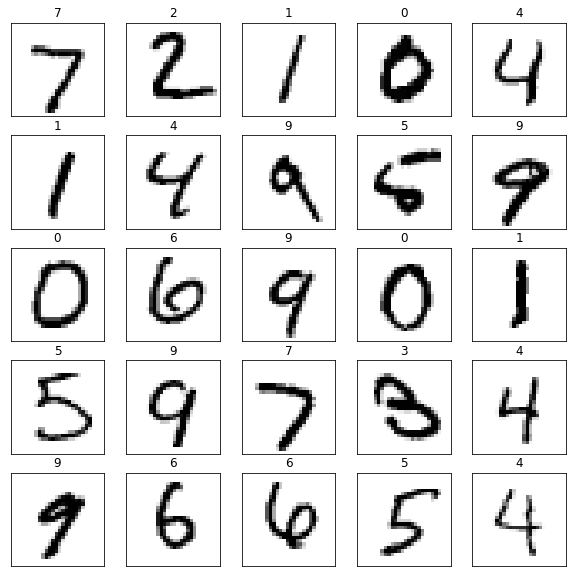

In [ ]:
plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    plt.title(y_test[i])

plt.show()

In [ ]:
model = tf.keras.Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(128, activation="relu"),
    Dense(10, activation="softmax"),
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [ ]:
history = model.fit(x=x_train, y=y_train_cat, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2887 - accuracy: 0.9176 - val_loss: 0.1495 - val_accuracy: 0.9581
Epoch 2/5
1500/1500 [==============================] - 1s 961us/step - loss: 0.1297 - accuracy: 0.9621 - val_loss: 0.1174 - val_accuracy: 0.9684
Epoch 3/5
1500/1500 [==============================] - 1s 958us/step - loss: 0.0892 - accuracy: 0.9730 - val_loss: 0.1099 - val_accuracy: 0.9688
Epoch 4/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0665 - accuracy: 0.9801 - val_loss: 0.0887 - val_accuracy: 0.9737
Epoch 5/5
1500/1500 [==============================] - 1s 968us/step - loss: 0.0502 - accuracy: 0.9847 - val_loss: 0.0865 - val_accuracy: 0.9751


In [ ]:
model.evaluate(x_test, y_test_cat)

313/313 [==============================] - 0s 887us/step - loss: 0.0791 - accuracy: 0.9757


[0.07912622392177582, 0.9757000207901001]

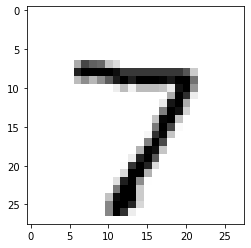

In [ ]:
plt.imshow(x_test[0], cmap=plt.cm.binary)
plt.show()

In [ ]:
model.predict(np.expand_dims(x_test[0], axis=0)).argmax()

7

In [ ]:
model.predict(np.array([x_test[0]])).argmax()

7

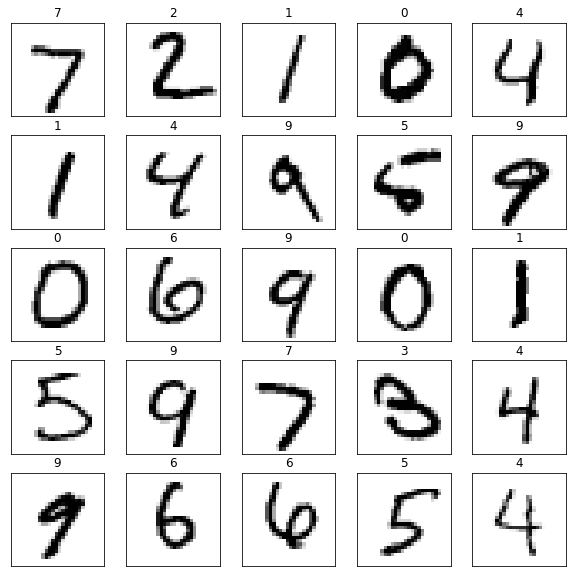

In [ ]:
plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    predicted = model.predict(np.expand_dims(x_test[i], axis=0)).argmax()
    color = "black" if predicted == y_test[i] else "red"
    plt.title(predicted, c=color)

plt.show()